# 0.0 Imports

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import inflection
from IPython.display import Image
import datetime

In [2]:
plt.style.use('ggplot')

## 0.1 Helper Functions

## 0.2 Loading data

In [3]:
#dataset que contém dados das vendas
df_sales_raw = pd.read_csv('../data/train.csv', low_memory=False)

#dataset que contém dados das lojas
df_stores_raw = pd.read_csv('../data/store.csv', low_memory=False)

#dataset final
df_raw = pd.merge(df_sales_raw, df_stores_raw, how='left', on='Store')

In [4]:
df_sales_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
df_stores_raw.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 1.0 Descrição e limpeza dos dados

## Qual é a motivação por trás dessa tarefa?

Descobrir o quão desafiador é o problema.

* É preciso saber a quantidade de dados:
    * eu tenho recursos corretos para trabalhar?
    * preciso de servidores? clusters? ferramentas para trabalhar com esses dados, como spark e hadoop?
    
* Tipos de variáveis:
    * quais os tipos de variáveis? % de numéricas, categóricas e temporais.
    
* Quantidade de dados faltantes:
    * qual o volume de dados NA?
    * qual a razão de faltar dados? é o sistema? input manual?
    
* Resumo geral dos dados:
    * estatística descritiva - importante para ter uma noção dos dados. dos limites máximos e mínimos..

## Data Dictionary

* Id - an Id that represents a (Store, Date) duple within the test set
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## 1.1 Rename Columns

In [7]:
df1 = df_raw.copy()

É importante para criar um padrão nos nomes da coluna, além de renomear colunas que possuem nomes que não fazem muito sentido ou que são muito extensos. Isso facilita todo o desenvolvimento. Nesse ambiente do Kaggle e de datasets de estudo, as colunas já vem melhor nomeadas. Mas no contexto real nem sempre é assim. Por isso é uma boa prática realizar essa etapa.

In [8]:
#colunas antigas
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 
            'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

#função para alterar o nome das colunas para o formato snakecase
change_to_snakecase = lambda x: inflection.underscore(x)

#aplicando a função nas colunas antigas
new_cols = list(map(change_to_snakecase, cols_old))

#renomeando as colunas
df1.columns = new_cols

#verificando os novos nomes
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 Data dimension

In [9]:
shape = df1.shape
print(f'Number of rows: {shape[0]}')
print(f'Number of columns: {shape[1]}')

Number of rows: 1017209
Number of columns: 18


## 1.3 Data types

In [10]:
#alterando o tipo da coluna date para datetime (estava como object)
df1['date'] = pd.to_datetime(df1['date'])

df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Verificação de dados faltantes

In [11]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Substituição dos dados faltantes

Existem basicamente três maneiras para lidar com dados faltantes:
1. Eliminar as linhas que possuem NA
    * Vantagem: rápido e fácil
    * Desvantagem: pode desperdiçar dados
    
    
2. Substituir os faltantes por métricas (média, mediana...) ou por previsão de algoritmos


3. Conhecendo do negócio e entendendo por que esses NAs estão aí


##### competition_distance

É a distância em metros até a loja concorrente mais próxima.

* Hipótese: se esse valor está nulo, é porque não há competidor próximo. O concorrente está muito longe.

  Assumindo essa hipótese, substituirei os nulos dessa coluna por um 3x maior que o maior valor da coluna. 

In [12]:
max_value = df1['competition_distance'].max()
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: max_value*3 if math.isnan(x) else x)

#### competition_open_since_month & competition_open_since_year 

Dá aproximadamente o ano e o mês em que o competidor mais próximo foi aberto.

Pensando no negócio, essa coluna pode estar nula basicamente por duas razões:
1. Não existe um competidor próximo.
2. Existe um competidor mas alguém esqueceu de anotar, ou porque abriu muito antes ou muito depois.

Hipótese: Irei optar por manter essa coluna pois acredito que ela deve inlfuenciar nos resultados, já que o fato de uma loja possuir um competidor próximo ou não impacta diretamente nas vendas. Ainda mais nos casos em que temos um valor preenchido para 'competition_distance', não faria sentido colocar 0 para a 'competition_open_since_month' e 'competition_open_since_year', já que está sendo afirmado que existe um competidor.

Para preencher a coluna, então, pegarei o mês e o ano da linha em questão.

In [13]:
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

#### promo2_since_week & promo2_since_year

Descreve o ano e a semana do calendário quando a loja começou a participar da Promo2. A Promo2 é a continuação de uma primeira promoção (0 se não participar dessa continuação e 1 se participou).

Para a substituição dos faltantes nessa coluna, seguirei a mesma lógica das colunas 'competition_open_since_month' e 'competition_open_since_year'.

In [14]:
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

#### promo_interval              

Descreve os intervalos consecutivos que a Promo2 começou, nomeando os meses que a promoção ficou ativa. Por exemplo, "Feb, May, Aug, Nov" significa que cada round começou em Fevereiro, depois de novo em Maio, Agosto e Novembro do ano descrito para a loja específica.

* Caso o campo dessa coluna esteja nulo, será substituído por 0, indicando que não foi feita continuação da Promo2.

In [15]:
#diicionário para mapear os meses
month_map = {
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sept',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}

#preenche os nulos com 0
df1['promo_interval'].fillna(0, inplace=True)

#cria uma coluna 'month_map' com o nome dos meses
df1['month_map'] = df1.date.dt.month.map(month_map)

#cria uma coluna 'is_promo' que indica se no mês do registro teve Promo2 ou não
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

### 1.5.1 Verificando de novo os Data Types

In [16]:
# competition_open_since_month
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)

# competition_open_since_year 
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)

# promo2_since_week           
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)

# promo2_since_year           
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

In [17]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.6 Estatística Descritiva 

A estatística descritiva é útil por, basicamente, duas razões:

1. Por meio dela é possível ganhar conhecimento de negócio:
    * Métricas de dispersão (saber o quão esparso os dados estão em torno da média)
    * Métricas de tendência central (resumem os dados em um único número)
    
    
2. Detecção de erros
    * Por ex, se tiver um valor de vendas negativo, isso não faz sentido nenhum

### 1.6.1 Separação em atributos numéricos e categóricos

In [18]:
#separação das colunas em categóricas e numéricas

num_attributes = df1.select_dtypes(include=['int64', 'int32', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'int32', 'float64', 'datetime64[ns]'])

In [19]:
display(num_attributes.sample())
display(cat_attributes.sample())

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
163697,908,6,2165,213,1,0,0,1980.0,7,2010,1,37,2009,0


,state_holiday,store_type,assortment,promo_interval,month_map
617060,c,a,c,"Feb,May,Aug,Nov",Dec


### 1.6.2 Atributos numéricos

<b> Medidas de tendência central </b>

In [20]:
central_tendency = num_attributes.describe().loc[["mean", "50%"]].T
central_tendency.columns = ['mean', 'median']

<b> Medidas de dispersão </b>

In [21]:
dispersion = num_attributes.describe().loc[['min', 'max', 'std']].T
dispersion['range'] = dispersion[['min', 'max']].apply(lambda x: x['max'] - x['min'], axis=1)
dispersion['skewness'] = num_attributes.apply(lambda x: x.skew())
dispersion['kurtosis'] = num_attributes.apply(lambda x: x.kurtosis())

<b> Concatenação das medidas de tendência central e dispersão </b>

In [22]:
descriptive_statistics = pd.concat([central_tendency, dispersion], axis=1)
descriptive_statistics = descriptive_statistics.reset_index()
descriptive_statistics.rename(columns={'index': 'attributes'}, inplace=True)
descriptive_statistics[['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skewness', 'kurtosis']]

,attributes,min,max,range,mean,median,std,skewness,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908651,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997391,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.926175,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411734,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485759,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,227580.0,227560.0,6007.076294,2330.0,13682.735149,11.512969,177.136255
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311087,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515593,-7.235657,124.071304


<b> Alguns insights </b>

'sales'
* não existem vendas negativas, o que dá uma primeira impressão de ausência de erros na inserção desses dados.
* a explicação para vendas igual a 0 é de que a loja estava fechada no momento em que isso foi analisado. 
* a média e mediana são bem parecidas, ou seja, essa distribuição não é tão distoante da normal, o que é visto também pela skew bem próxima de zero e a kurtosis de 1.77, que mostra que não existe um pico muito grande.

[]

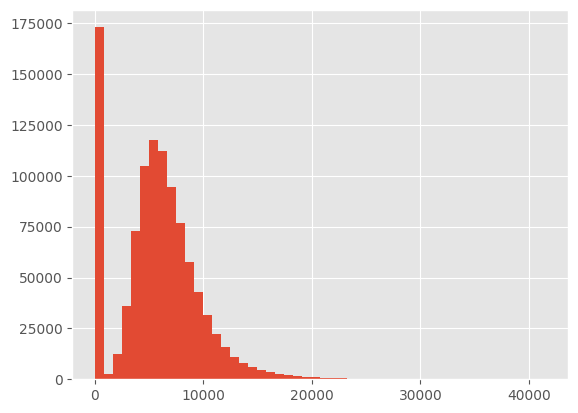

In [23]:
df1['sales'].hist(bins=50)
plt.plot()

'competition_distance'

* skew positiva alta --> alto deslocamento dos dados para a esquerda, dados concentrados à esquerda
* kurtosis positiva muito alta --> existe um pico muito grande, os dados estão bem concentrados ao redor da média

[]

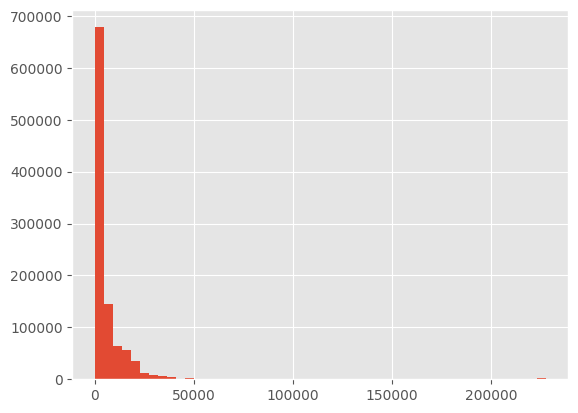

In [24]:
df1['competition_distance'].hist(bins=50)
plt.plot()

'customers'

* média de 633 clientes por dia circulando nas lojas, com désvio padrão de 464, então as vezes tem 1000 pessoas, as vezes 200.
* skew positiva de 1.6 --> dados concentrados a esquerda (cauda formada à direita), mas não tão concentrados. A média é maior que a mediana, isso significa que há mais dias em que circula um número de clientes abaixo da média.
* kurtosis positiva de 7 --> existe um pico nos dados e estão concentrados ao redor da média

[]

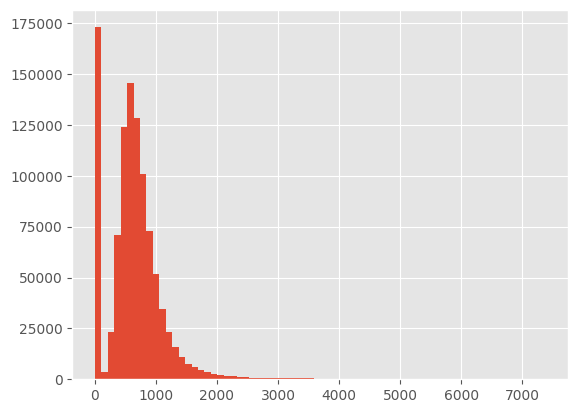

In [25]:
df1['customers'].hist(bins=70)
plt.plot()

### 1.6.3 Atributos categóricos

In [26]:
#quantos únicos cada coluna tem
cat_attributes.apply(lambda x: x.nunique())

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

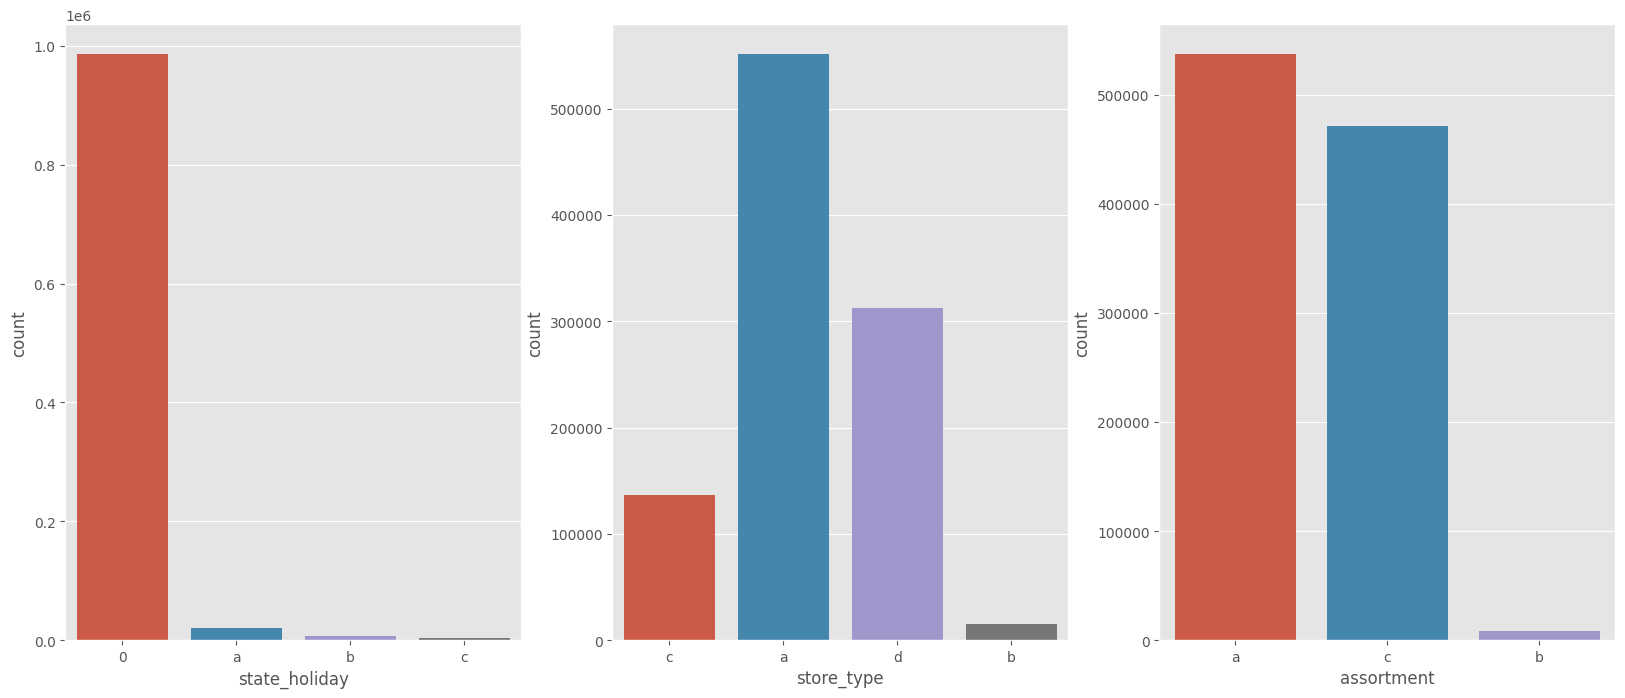

In [27]:
#quanto tem de cada categoria
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
sns.countplot(data=df1, x='state_holiday')

plt.subplot(1, 3, 2)
sns.countplot(data=df1, x='store_type')

plt.subplot(1, 3, 3)
sns.countplot(data=df1, x='assortment')

plt.show()

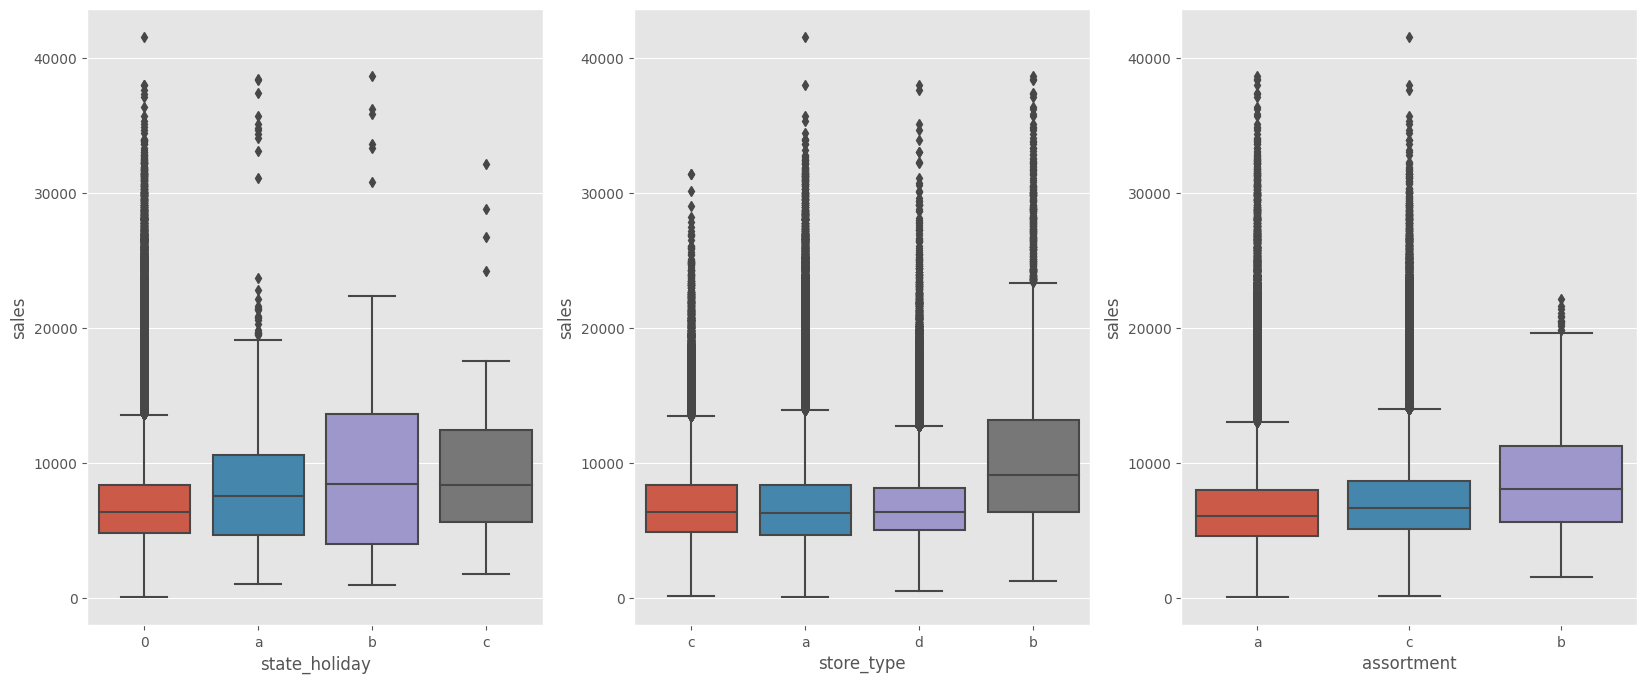

In [28]:
#comparação entre as vendas e 'state_holiday', 'assortment' e 'store_type'
aux = df1[(df1['state_holiday'] != 0) & (df1['sales'] > 0)]

plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
sns.boxplot(data=aux, x='state_holiday', y='sales')

plt.subplot(1, 3, 2)
sns.boxplot(data=aux, x='store_type', y='sales')

plt.subplot(1, 3, 3)
sns.boxplot(data=aux, x='assortment', y='sales')

plt.show()

# 2.0 Feature Engineering

## Qual é a motivação por trás dessa tarefa?

É preciso realizar essa tarefa para possuir as variáveis disponíveis para estudo durante a análise exploratória de dados.

Isso ajuda também a tornar o código mais limpo e mais dividido, para evitar de criar as variáveis durante a análise exploratória de dados e daí misturar duas etapas em uma só.

Mas como saber quais variáveis devo tentar derivar se não explorei os dados? Isso é feito por meio do mindmap de hipóteses.

## 2.1 Mindmap de hipóteses

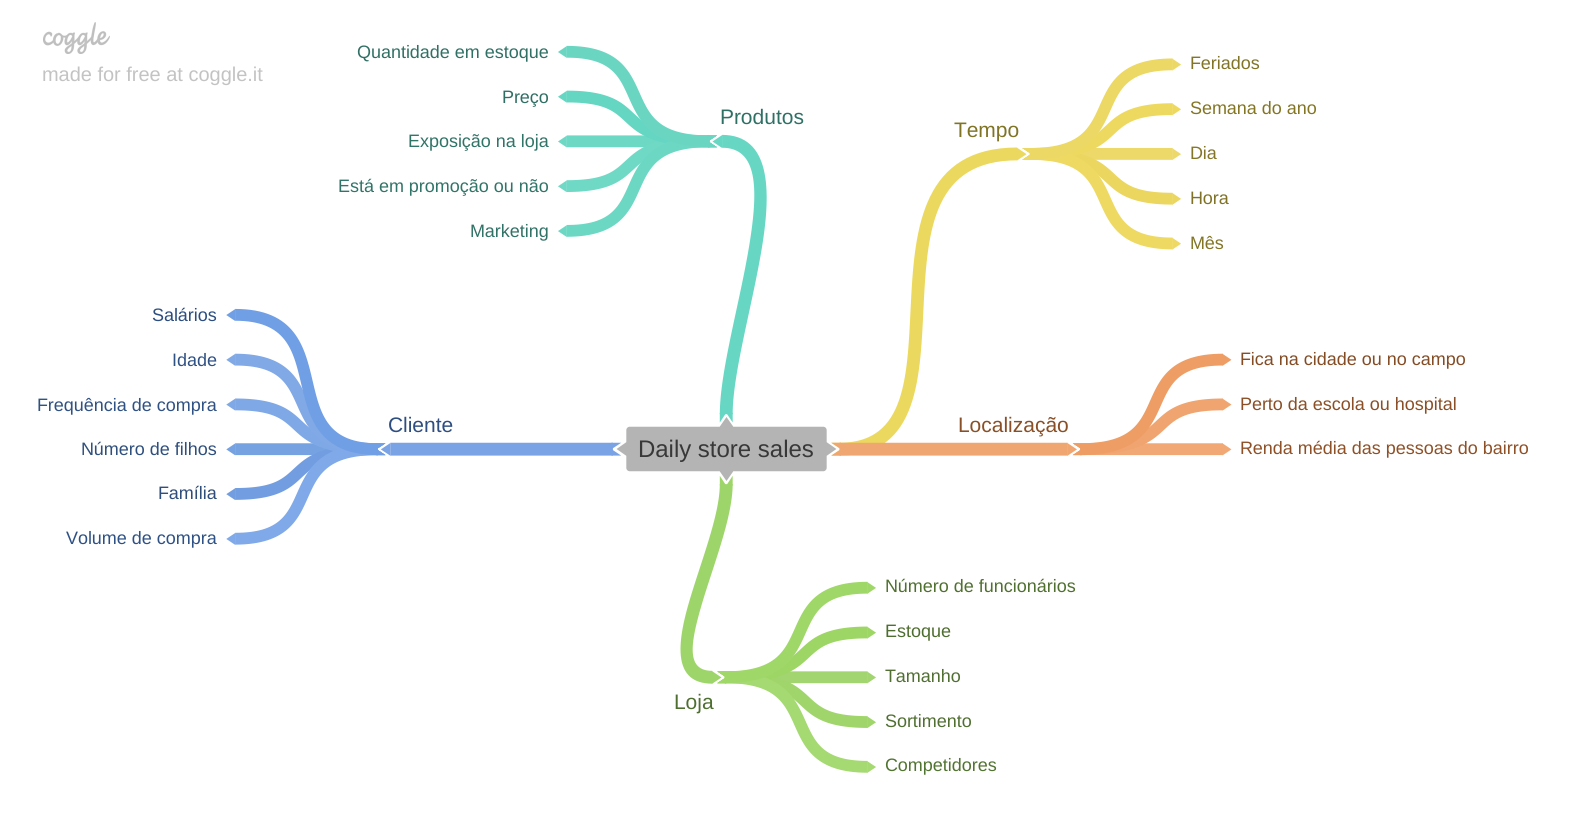

In [29]:
Image('../notes/mindmap_de_hipóteses.png')

## 2.2 Criação das hipóteses

A partir do mindmap acima, conseguimos relacionar os atributos dos agentes com o comportamento de nosso fenômeno, assim, é possível criar as hipóteses para validarmos na análise exploratória dos dados.

Sempre tendo em mente duas coisas:
* Hipóteses são apostas. São suposições sobre como os agentes influenciam no fenômeno modelado.
* Validando ou negando nossas hipóteses nós descobrimos relações de correlação entre variáveis e não de causa e efeito. Se eu descobrir que lojas maiores vendem mais, não dá para simplesmente sair construindo mais lojas.

### 2.2.1 Hipóteses relacionadas ao Produto

**1.** Lojas com produtos com preços menores deveriam vender mais.

**2.** Lojas com produtos em promoção por mais tempo deveriam vender mais.

**3.** Lojas que investem mais em marketing deveriam vender mais.

**4.** Lojas com mais promoções consecutivas deveriam vender mais.

**5.** Lojas com maior exposição dos produtos deveriam vender mais.

### 2.2.2 Hipóteses relacionadas as lojas

**1.** Lojas com mais funcionários deveriam vender mais.

**2.** Lojas com um estoque maior deveriam vender mais.

**3.** Lojas maiores (em tamanho) deveriam vender mais.

**4.** Lojas com mais sortimento deveriam vender mais.

**5.** Lojas com competidores mais próximos deveriam vender menos.

**6.** Lojas mais novas (abertas nos últimos 6 meses) deveriam vender mais.

### 2.2.3 Hipóteses relacionadas ao Tempo

**1**. Lojas abertas durante o feriado de Natal deveriam vender mais.

**2**. Lojas deveriam vender mais ao longo dos anos.

**3**. Lojas deveriam vender mais no segundo semestre do ano.

**4**. Lojas deveriam vender mais depois do dia 10 de cada mês.

**5**. Lojas deveriam vender menos aos finais de semana.

**6**. Lojas deveriam vender menos durante os feriados escolares

## 2.3 Lista final de hipóteses

A partir das hipóteses selecionadas acima, priorizamos elas e criamos essa lista final de hipóteses a serem avaliadas. Essa priorização é feita com base em um critério: "temos os dados disponíveis para responder a hipótese X?". É importante lembrar que o CRISP-DS é uma metodologia de desenvolvimento iterativa. Portanto, neste primeiro ciclo validaremos as hipóteses as quais temos dados disponíveis, mas caso verificarmos que essas variáveis não estão fazendo o modelo performar bem, temos de voltar a etapa inicial de coleta dos dados e buscar por novas fontes de dados.

**1**. Lojas com maior sortimentos deveriam vender mais.

**2**. Lojas com competidores mais próximos deveriam vender menos.

**3**. Lojas com competidores à mais tempo deveriam vendem mais.

**4**. Lojas com promoções ativas por mais tempo deveriam vender mais.

**5**. Lojas com mais dias de promoção deveriam vender mais.

**7**. Lojas com mais promoções consecutivas deveriam vender mais.

**8**. Lojas abertas durante o feriado de Natal deveriam vender mais.

**9**. Lojas deveriam vender mais ao longo dos anos.

**10**. Lojas deveriam vender mais no segundo semestre do ano.

**11**. Lojas deveriam vender mais depois do dia 10 (dia do pagamento) de cada mês.

**12**. Lojas deveriam vender menos aos finais de semana.

**13**. Lojas deveriam vender menos durante os feriados escolares


## 2.4 Feature Engineering

In [86]:
df2 = df1.copy()

In [87]:
#year
df2['year'] = df2['date'].dt.year

#month
df2['month'] = df2['date'].dt.month

#day
df2['day'] = df2['date'].dt.day

#week_of_year -> semana do ano
df2['week_of_year'] = df2['date'].dt.strftime('%W')

#year_week -> ano-semana do ano
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

#competition_since (formatado o dia que a competição começou no mesmo formato que 'date')
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1), axis=1)

#competition_time_month (tempo em meses desde que a competição começou)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)

#promo_since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w'))
df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)
df2['promo_time_week'] = df2['promo_time_week'].apply(lambda x: 0 if x == -1 else x)

#assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

#state_holiday a = public holiday, b = Easter holiday, c = Christmas, 0 = None
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public holiday' if x == 'a' else 'public holiday' if x == 'b' else 'Christmas' if x == 'c' else 'regular_day')

# 3.0 Filtragem de Variáveis

## Qual é a motivação por trás dessa tarefa?

Considerar as restrições de negócio.

Muitas vezes um projeto é feito e na hora de colocar o projeto em produção percebe-se que isso não será possível, pois as restrições de negócio não foram consideradas.

Então o ideal é já pensar nessas restrições logo no início do projeto.

Outro ponto, é a diferença entre **filtrar variáveis e selecionar variaveís**.

Filtragem de variáveis:
* Restrições de acordo com o negócio. -> não ter a possibilidade de usar determinada variável.

Seleção de variáveis:
* Variáveis mais relevantes para o modelo.

## 3.1 Filtragem das linhas

Primeiro a gente filtra as linhas, depois seleciona as colunas. Por uma questão de perfomance.. Filtrando as linhas, reduz o volume dos dados e a partir disso seleciona as colunas.

Condições para filtragem das linhas:
    
**1.** Se a coluna 'open' for igual a 0, significa que a loja não estava aberta naquele dia, o que significa que nenhuma venda será feita. Ou seja, não temos aprendizado com isso.

**2.** O valor de vendas deve ser maior do que 0. Queremos modelar aquilo que impacta nas vendas. Se tenho uma linha que tem vendas igual a 0, não consigo aprender nada com ela.

In [89]:
df3 = df2.copy()

In [91]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)] 

## 3.2 Seleção das colunas

Colunas que serão filtradas:

**customers**
* Não é possível ter o número de clientes que terá na loja nas próximas 6 semanas, que é o período que nossa predição será feita. Então, no momento da predição não temos ela.

**open**
* Uma vez que dropamos todas as linhas iguais a 0, só restaram linhas em que open = 1.

**promo_interval**
* Coluna auxiliar para gerar 'is_promo'.

**month_map**
* Coluna auxiliar para gerar 'is_promo'.


In [92]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop(cols_drop, axis=1)

In [93]:
df3.to_csv('../generated_data/df_to_explore.csv')

# 4.0 Exploratory Data Analysis (EDA)